In [ ]:
# The date was downloaded from OpenStreetMap you can downlaod the that for your aoi and use like this

In [2]:
# Import libraries
import pandas as pd
import geopandas as gpd

In [5]:
# Read the files 
df = gpd.read_file('Shp/Guayaqui_Poligonos.shp')

<Axes: >

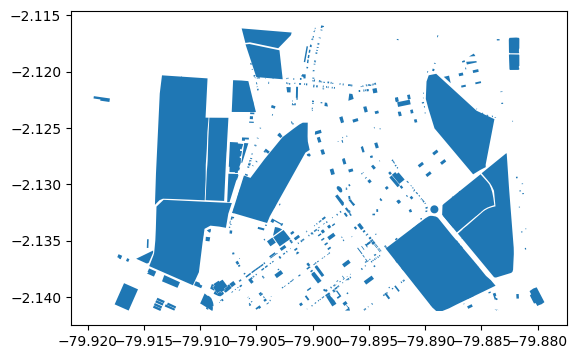

In [6]:
df.plot()

In [7]:
df.head()

,osm_id,osm_way_id,name,type,aeroway,amenity,admin_leve,barrier,boundary,building,...,military,natural,office,place,shop,sport,tourism,other_tags,Area,geometry
0,2048284,NaN,Los Ãlamos,boundary,NaN,NaN,10,NaN,administrative,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""is_in:county""=>""Guayaquil"",""wikidata""=>""Q5547...",411645.776,"POLYGON ((-79.90771 -2.13387, -79.90830 -2.133..."
1,6415358,NaN,Centro Comercial Polaris,multipolygon,NaN,NaN,NaN,NaN,NaN,commercial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""addr:street""=>""Isidro Ayora Cueva""",3600.819,"MULTIPOLYGON (((-79.90054 -2.11775, -79.90041 ..."
2,NaN,35692043,Parque de la 4ta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3827.957,"POLYGON ((-79.89476 -2.13811, -79.89455 -2.138..."
3,NaN,35692054,Albocentro I,NaN,NaN,NaN,NaN,NaN,NaN,retail,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1010.729,"POLYGON ((-79.89677 -2.14088, -79.89669 -2.141..."
4,NaN,35692055,Albocentro II,NaN,NaN,NaN,NaN,NaN,NaN,retail,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1470.616,"POLYGON ((-79.89786 -2.14006, -79.89763 -2.139..."


In [17]:
# Check for the unique value
for item in df.columns[:-1]:
    uniquelist = df[item].unique()
    if uniquelist.flatten().shape[0]<10:
        print('Column name: {}'.format(item))
        print('Unique values:{}'.format(df[item].unique()))
        print('----------------')
              

Column name: osm_id
Unique values:['2048284' '6415358' nan]
----------------
Column name: type
Unique values:['boundary' 'multipolygon' nan]
----------------
Column name: aeroway
Unique values:[nan]
----------------
Column name: admin_leve
Unique values:['10' nan '9']
----------------
Column name: barrier
Unique values:[nan]
----------------
Column name: boundary
Unique values:['administrative' nan]
----------------
Column name: craft
Unique values:[nan 'electronics_repair' 'upholsterer']
----------------
Column name: geological
Unique values:[nan]
----------------
Column name: historic
Unique values:[nan]
----------------
Column name: land_area
Unique values:[nan]
----------------
Column name: landuse
Unique values:[nan 'retail' 'industrial' 'residential' 'commercial' 'recreation_ground']
----------------
Column name: leisure
Unique values:[nan 'park' 'pitch' 'recreation_ground' 'playground' 'sports_centre'
 'dancing' 'swimming_pool']
----------------
Column name: man_made
Unique valu

In [25]:
lu = df[df['landuse']!='']
lu.describe()

,aeroway,barrier,geological,historic,land_area,man_made,military,place,Area
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,715.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5301.641473
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40946.266658
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.062000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.352500
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.333000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,954.399000
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,584652.933000


<Axes: >

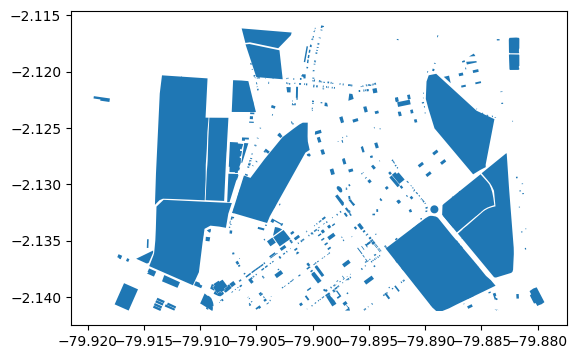

In [26]:
lu.plot()

<Axes: >

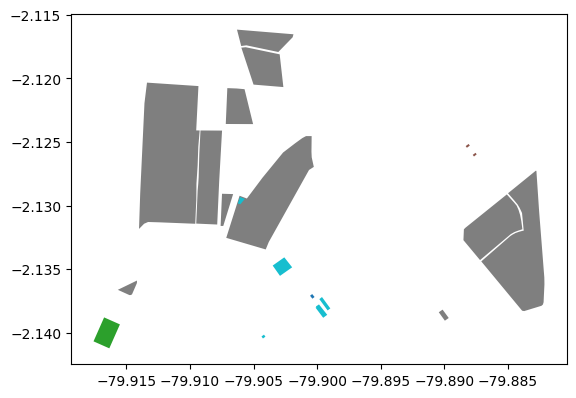

In [28]:
import matplotlib.pyplot as plt
lu.plot(column = 'landuse')

In [29]:
lu.total_bounds

array([-79.9194699,  -2.1412553, -79.8794057,  -2.1158941])

<Axes: >

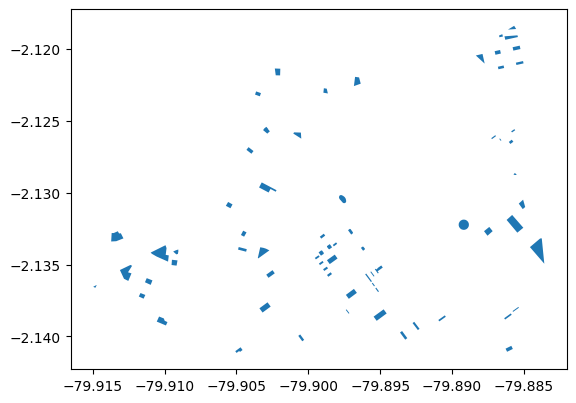

In [33]:
lupark = df[df['leisure']=='park']
lupark.plot()

In [39]:
lupark.dropna(axis=1, inplace=True)
lupark.describe()

C:\Users\Hp\AppData\Local\Temp\ipykernel_14884\4094127843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lupark.dropna(axis=1, inplace=True)


,Area
count,69.000000
mean,1791.947362
std,1958.444054
min,120.123000
25%,598.119000
50%,1103.094000
75%,2039.530000
max,10042.033000


# Work with polylines

In [40]:
dfline = gpd.read_file('Shp/Guayaqui_Lineas.shp')

In [41]:
dfline.columns

Index(['osm_id', 'name', 'highway', 'waterway', 'aerialway', 'barrier',
       'man_made', 'z_order', 'other_tags', 'SPEED2', 'geometry'],
      dtype='object')

In [42]:
dfline['highway'].value_counts()

highway
residential       1163
footway            625
living_street       90
tertiary            88
secondary           84
primary             50
service             34
primary_link        23
trunk_link          23
trunk               19
secondary_link      17
steps                8
tertiary_link        4
cycleway             2
unclassified         1
track                1
Name: count, dtype: int64

In [43]:
dfline['waterway'].value_counts()

waterway
canal     6
stream    1
river     1
Name: count, dtype: int64

<Axes: >

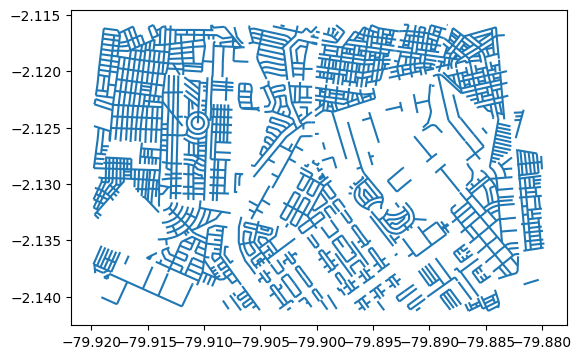

In [45]:
dfline[dfline['highway']=='residential'].plot()

<Axes: >

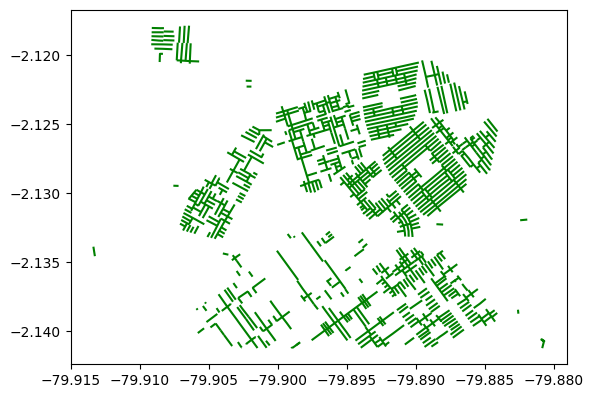

In [49]:
dfline[dfline['highway']=='footway'].plot(color='green')

In [50]:
dfline.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [60]:
# Create new column

lineutm = dfline.to_crs(epsg = '32717')
dfline['length'] = lineutm.length
lineutm.head()

,osm_id,name,highway,waterway,aerialway,barrier,man_made,z_order,other_tags,SPEED2,geometry,lenght,length
0,1,Francisco De Orellana,trunk,NaN,NaN,NaN,NaN,8,"""alt_name""=>""Eje"",""lanes""=>""3"",""maxspeed""=>""70...",60,"LINESTRING (621784.798 9763391.228, 621802.665...",30.090940,30.090940
1,1,Francisco De Orellana,trunk,NaN,NaN,NaN,NaN,28,"""alt_name""=>""Eje"",""bridge""=>""yes"",""lanes""=>""3""...",60,"LINESTRING (621540.661 9763732.764, 621561.161...",419.820969,419.820969
2,0,Francisco De Orellana,trunk,NaN,NaN,NaN,NaN,8,"""alt_name""=>""Eje"",""lanes""=>""3"",""oneway""=>""yes""...",120,"LINESTRING (621556.472 9763742.514, 621518.882...",498.183826,498.183826
3,1,Francisco De Orellana,trunk,NaN,NaN,NaN,NaN,28,"""alt_name""=>""Eje"",""bridge""=>""yes"",""lanes""=>""3""...",60,"LINESTRING (621801.488 9763400.989, 621667.648...",420.324454,420.324454
4,1,Rodolfo Baquerizo Nazur,primary,NaN,NaN,NaN,NaN,7,"""alt_name""=>""Calle 19 NE"",""lanes""=>""2"",""oneway...",60,"LINESTRING (621478.284 9764241.103, 621487.531...",31.682512,31.682512


In [61]:
lineutm.columns

Index(['osm_id', 'name', 'highway', 'waterway', 'aerialway', 'barrier',
       'man_made', 'z_order', 'other_tags', 'SPEED2', 'geometry', 'lenght',
       'length'],
      dtype='object')

In [62]:
lineutm[lineutm['highway'] =='primary']['length'].sum()

20633.07248596893